<a href="https://colab.research.google.com/github/deokwoo-han/abc/blob/master/09_27_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('credit_cards_dataset.csv')

In [ ]:
df.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [ ]:
import xgboost as xgb

In [ ]:
X = df.drop(['default.payment.next.month'], axis=1).values

In [ ]:
X[:, 0:3]

array([[1.0000e+00, 2.0000e+04, 2.0000e+00],
       [2.0000e+00, 1.2000e+05, 2.0000e+00],
       [3.0000e+00, 9.0000e+04, 2.0000e+00],
       ...,
       [2.9998e+04, 3.0000e+04, 1.0000e+00],
       [2.9999e+04, 8.0000e+04, 1.0000e+00],
       [3.0000e+04, 5.0000e+04, 1.0000e+00]])

In [ ]:
X[:,-4:-1]

array([[    0.,     0.,     0.],
       [ 1000.,  1000.,     0.],
       [ 1000.,  1000.,  1000.],
       ...,
       [22000.,  4200.,  2000.],
       [ 1178.,  1926., 52964.],
       [ 1430.,  1000.,  1000.]])

In [ ]:
X[-1, :]

array([3.0000e+04, 5.0000e+04, 1.0000e+00, 2.0000e+00, 1.0000e+00,
       4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 4.7929e+04, 4.8905e+04, 4.9764e+04,
       3.6535e+04, 3.2428e+04, 1.5313e+04, 2.0780e+03, 1.8000e+03,
       1.4300e+03, 1.0000e+03, 1.0000e+03, 1.0000e+03])

In [ ]:
X[-4:-1,:]

array([[ 2.9997e+04,  1.5000e+05,  1.0000e+00,  3.0000e+00,  2.0000e+00,
         4.3000e+01, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         0.0000e+00,  0.0000e+00,  1.6830e+03,  1.8280e+03,  3.5020e+03,
         8.9790e+03,  5.1900e+03,  0.0000e+00,  1.8370e+03,  3.5260e+03,
         8.9980e+03,  1.2900e+02,  0.0000e+00,  0.0000e+00],
       [ 2.9998e+04,  3.0000e+04,  1.0000e+00,  2.0000e+00,  2.0000e+00,
         3.7000e+01,  4.0000e+00,  3.0000e+00,  2.0000e+00, -1.0000e+00,
         0.0000e+00,  0.0000e+00,  3.5650e+03,  3.3560e+03,  2.7580e+03,
         2.0878e+04,  2.0582e+04,  1.9357e+04,  0.0000e+00,  0.0000e+00,
         2.2000e+04,  4.2000e+03,  2.0000e+03,  3.1000e+03],
       [ 2.9999e+04,  8.0000e+04,  1.0000e+00,  3.0000e+00,  1.0000e+00,
         4.1000e+01,  1.0000e+00, -1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -1.0000e+00, -1.6450e+03,  7.8379e+04,  7.6304e+04,
         5.2774e+04,  1.1855e+04,  4.8944e+04,  8.5900e+04,  3.4090e+03,
  

In [ ]:
y = df['default.payment.next.month'].values

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split#매뉴얼 보기

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7, random_state=12345)#이때 쓰는 랜덤 테이블이 고정된 시드값
#12345

In [ ]:
X_train.shape

(21000, 24)

In [ ]:
X_train.shape[0]

21000

In [ ]:
X_train.shape[1]#shape의 컬럼값을 보는 법

24

In [ ]:
X_test.shape[1]

24

In [ ]:
X_test.shape[0]

9000

In [ ]:
Y_train.shape

(21000,)

In [ ]:
Y_test.shape

(9000,)

In [ ]:
#XGB Dmatrix 설정

In [ ]:
dtrain = xgb.DMatrix(X_train, label=Y_train)

In [ ]:
type(dtrain)

xgboost.core.DMatrix

In [ ]:
dtest = xgb.DMatrix(X_test, Y_test)

In [ ]:
type(dtest)

xgboost.core.DMatrix

In [ ]:
dtrain

In [ ]:
#ndarray는 아님 dmatrix? 
#https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [ ]:
param = {'max_depth': 10, 'eta': 0.01, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [ ]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [ ]:
num_round = 200
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.748744	train-auc:0.816506
[1]	eval-auc:0.75057	train-auc:0.816945
[2]	eval-auc:0.752557	train-auc:0.81945
[3]	eval-auc:0.7526	train-auc:0.82066
[4]	eval-auc:0.752553	train-auc:0.821054
[5]	eval-auc:0.755837	train-auc:0.829044
[6]	eval-auc:0.757128	train-auc:0.829003
[7]	eval-auc:0.758011	train-auc:0.832349
[8]	eval-auc:0.761514	train-auc:0.836774
[9]	eval-auc:0.761362	train-auc:0.836421
[10]	eval-auc:0.762159	train-auc:0.838219
[11]	eval-auc:0.762403	train-auc:0.839287
[12]	eval-auc:0.763928	train-auc:0.840075
[13]	eval-auc:0.764459	train-auc:0.840646
[14]	eval-auc:0.764367	train-auc:0.840674
[15]	eval-auc:0.765057	train-auc:0.841301
[16]	eval-auc:0.765243	train-auc:0.841373
[17]	eval-auc:0.765804	train-auc:0.842087
[18]	eval-auc:0.76648	train-auc:0.842928
[19]	eval-auc:0.766312	train-auc:0.842765
[20]	eval-auc:0.766516	train-auc:0.842993
[21]	eval-auc:0.766816	train-auc:0.843683
[22]	eval-auc:0.766645	train-auc:0.8439
[23]	eval-auc:0.766501	train-auc:0.84456
[24]	eval-a

In [ ]:
bst.save_model('0001.model')

In [ ]:
#bst.load_model('./0001.model')#학습된 모델을 바로 올/돌릴 수 있게 됨, 오후에 다시 할 것 저장하고 불러오기

In [ ]:
#prediction

In [ ]:
ypred = bst.predict(dtest)

In [ ]:
type(ypred)

numpy.ndarray

In [ ]:
ypred[:3] #0,1,2

array([0.7479134 , 0.18873663, 0.18588933], dtype=float32)

In [ ]:
#3가지 방법? 라운드 값을 취해서 np.

In [ ]:
import numpy as np

In [ ]:
predictions = np.round(ypred)

In [ ]:
predictions#정답값은 Y_test

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(Y_test, predictions)

0.3565970453387672

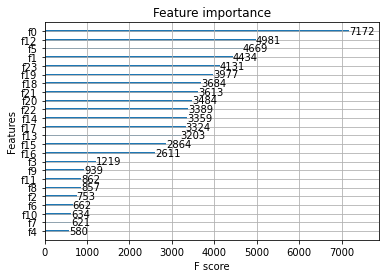

In [ ]:
xgb.plot_importance(bst)